In [2]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,username,content,date,country,replyCount,retweetCount,likeCount,url,sentiment
0,0,cian2me,@chronicle Dr. Biden will explain to Epstein w...,2020-12-18 22:07:24+00:00,France,0,0,5,https://twitter.com/cian2me/status/13400560958...,Pro Trump
1,1,cheekymiller89,I can't believe #Trump is taking legal action ...,2020-11-10 19:33:50+00:00,France,1,0,2,https://twitter.com/cheekymiller89/status/1326...,Pro Biden
2,2,himabista,You uplift women as you climb the ladder for e...,2020-11-25 08:03:14+00:00,China,0,0,1,https://twitter.com/himabista/status/133150873...,Pro Biden
3,3,abmowat,Is that orange shithead gone yet?\n#DictatorTr...,2020-11-03 16:18:00+00:00,France,0,0,0,https://twitter.com/abmowat/status/13236607109...,Pro Biden
4,5,trevahhhNstuff,Lmdao you going to have white people thinking ...,2020-12-02 01:17:52+00:00,South Korea,0,0,0,https://twitter.com/trevahhhNstuff/status/1333...,Pro Trump


In [11]:
df.shape

(27712, 12)

In [4]:
def logFinder(df):
    if df == 0:
        x = 1
    else:
        x = 1+np.log(2*df)
    return x

In [5]:
rep = df['replyCount'].apply(lambda x: logFinder(x))
ret = df['retweetCount'].apply(lambda x: logFinder(x))
lik = df['likeCount'].apply(lambda x: logFinder(x))

df['weightedSentiment'] = 1*rep*ret*lik

In [6]:
a, b = 0, 1
x, y = df.weightedSentiment.min(), df.weightedSentiment.max()
df['weightedSentimentNorm'] = (df.weightedSentiment - x) / (y - x) * (b - a) + a

In [7]:
df.head()

,Unnamed: 0,username,content,date,country,replyCount,retweetCount,likeCount,url,sentiment,weightedSentiment,weightedSentimentNorm
0,0,cian2me,@chronicle Dr. Biden will explain to Epstein w...,2020-12-18 22:07:24+00:00,France,0,0,5,https://twitter.com/cian2me/status/13400560958...,Pro Trump,3.302585,0.003204
1,1,cheekymiller89,I can't believe #Trump is taking legal action ...,2020-11-10 19:33:50+00:00,France,1,0,2,https://twitter.com/cheekymiller89/status/1326...,Pro Biden,4.040348,0.004231
2,2,himabista,You uplift women as you climb the ladder for e...,2020-11-25 08:03:14+00:00,China,0,0,1,https://twitter.com/himabista/status/133150873...,Pro Biden,1.693147,0.000964
3,3,abmowat,Is that orange shithead gone yet?\n#DictatorTr...,2020-11-03 16:18:00+00:00,France,0,0,0,https://twitter.com/abmowat/status/13236607109...,Pro Biden,1.000000,0.000000
4,5,trevahhhNstuff,Lmdao you going to have white people thinking ...,2020-12-02 01:17:52+00:00,South Korea,0,0,0,https://twitter.com/trevahhhNstuff/status/1333...,Pro Trump,1.000000,0.000000


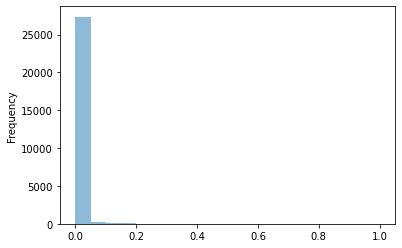

In [8]:
ax = df['weightedSentimentNorm'].plot.hist(bins=20, alpha=0.5)

In [21]:
df.groupby(['country', 'sentiment']).agg(['count', 'sum'])['weightedSentimentNorm']

count        sum
country      sentiment                  
Afghanistan  Pro Biden    728   3.060130
             Pro Trump    181   0.331133
Australia    Pro Biden   1059   5.378802
             Pro Trump    731   2.036534
Brazil       Pro Biden   1298   4.373934
             Pro Trump    831   2.130744
Canada       Pro Biden   1151   5.076177
             Pro Trump    767   1.851881
China        Pro Biden    604   1.482787
             Pro Trump    314   1.297892
France       Pro Biden   2328  10.222376
             Pro Trump   1049   2.708367
Germany      Pro Biden    390   1.896711
             Pro Trump    359   1.145072
India        Pro Biden   1699   6.593219
             Pro Trump    623   1.760649
Indonesia    Pro Biden   1038   2.618412
             Pro Trump    252   0.387142
Iran         Pro Biden    220   0.496881
             Pro Trump    140   0.347130
Israel       Pro Biden    636   2.568697
             Pro Trump    220   0.771813
Japan        Pro Biden    290   0.807717
             Pro Trump    113   0.585576
Kenya        Pro Biden    717   3.040431
             Pro Trump    313   1.449003
Mexico       Pro Biden   1393   6.529880
             Pro Trump    444   1.843050
Nigeria      Pro Biden   1247   5.323229
             Pro Trump    692   3.358437
Philippines  Pro Biden     64   0.125730
             Pro Trump     10   0.015117
Russia       Pro Biden    641   2.093741
             Pro Trump    416   1.241686
Saudi Arabia Pro Biden    178   0.540696
             Pro Trump    185   0.283402
Singapore    Pro Biden    319   1.503000
             Pro Trump    105   0.276576
South Korea  Pro Biden    486   0.905216
             Pro Trump    349   0.924605
Taiwan       Pro Biden    140   0.230932
             Pro Trump     37   0.053982
UK           Pro Biden   1652   6.042433
             Pro Trump    673   2.030618
Ukraine      Pro Biden    442   1.354128
             Pro Trump    188   0.718820

In [9]:
df.to_csv("dataForSolr.csv")